In [5]:
import h5py
import numpy as np

file_path = '/ca24/AstroCode-Collective/src/daneel/detection/Simple_Transmission_forward.h5'

# Open the file and inspect its structure
with h5py.File(file_path, 'r') as f:
    print("Datasets and groups in the file:")
    def print_structure(name, obj):
        print(name)
    f.visititems(print_structure)


Datasets and groups in the file:
Bibliography
Bibliography/bibtex
Bibliography/short_form
ModelParameters
ModelParameters/Chemistry
ModelParameters/Chemistry/CH4
ModelParameters/Chemistry/CH4/gas_type
ModelParameters/Chemistry/CH4/mix_ratio
ModelParameters/Chemistry/CH4/molecule_name
ModelParameters/Chemistry/CO
ModelParameters/Chemistry/CO/gas_type
ModelParameters/Chemistry/CO/mix_ratio
ModelParameters/Chemistry/CO/molecule_name
ModelParameters/Chemistry/CO2
ModelParameters/Chemistry/CO2/gas_type
ModelParameters/Chemistry/CO2/mix_ratio
ModelParameters/Chemistry/CO2/molecule_name
ModelParameters/Chemistry/H2O
ModelParameters/Chemistry/H2O/gas_type
ModelParameters/Chemistry/H2O/mix_ratio
ModelParameters/Chemistry/H2O/molecule_name
ModelParameters/Chemistry/active_gases
ModelParameters/Chemistry/chemistry_type
ModelParameters/Chemistry/fill_gases
ModelParameters/Chemistry/inactive_gases
ModelParameters/Chemistry/ratio
ModelParameters/Contributions
ModelParameters/Contributions/Absorption

In [15]:

# adjusted: Save forward model parameters to .txt file
parameters_output_path = '/ca24/AstroCode-Collective/HD_209458_b_assignment3_taskA_parameters.txt'
forward_model_parameters = """
Planetary Parameters:
- Planet Name: HD 209458 b
- Atmospheric Composition: H2O, CH4, CO2, CO (randomized abundances [10^-8, 10^-2])
- Planetary Radius: 1.39 R_J
- Semi-major Axis: 0.047 AU
- Mass: 0.73 M_J
- Orbital Period: 3.52
- Temperature: 1200 K

Stellar Parameters:
- Stellar Temperature: 6050 K
"""
with open(parameters_output_path, 'w') as f:
    f.write(forward_model_parameters)


/tmp/ipykernel_753/1597841694.py:26: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(plot_output_path)


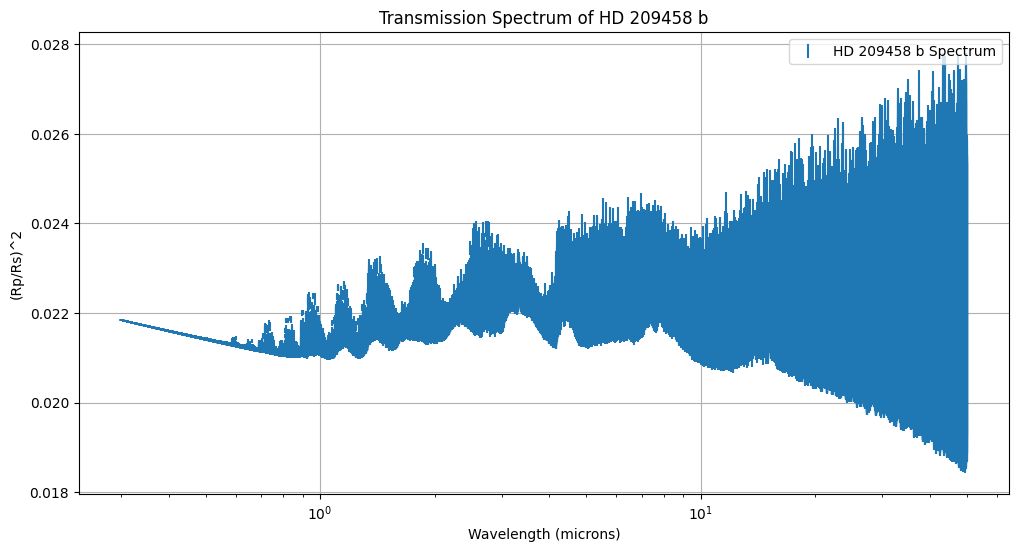

Plot saved to: /ca24/AstroCode-Collective/HD_209458_b_assignment3_taskA_spectrum.png


In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Load the .dat file
dat_file_path = "/ca24/AstroCode-Collective/HD_209458_b_assignment3_taskA_spectrum.dat"
data = np.loadtxt(dat_file_path, skiprows=1)  # Skip the header row
wavelength = data[:, 0]  # Wavelength column
transit_depth = data[:, 1]  # (Rp/Rs)^2 column
error = data[:, 3]  # Error column

#print(wavelength)

# Plot the spectrum
plt.figure(figsize=(12, 6))
#plt.scatter(wavelength,transit_depth, s=1)
plt.errorbar(wavelength, transit_depth, yerr=error, fmt=' ', label='HD 209458 b Spectrum')
plt.xscale('log')
plt.xlabel('Wavelength (microns)')
plt.ylabel('(Rp/Rs)^2')
plt.title('Transmission Spectrum of HD 209458 b')
plt.legend()
plt.grid(True)

# Save the plot
plot_output_path = "/ca24/AstroCode-Collective/HD_209458_b_assignment3_taskA_spectrum.png"
plt.savefig(plot_output_path)
plt.show()

print(f"Plot saved to: {plot_output_path}")


In [1]:
import numpy as np

# File paths
input_file = "/ca24/AstroCode-Collective/HD_209458_b_assignment3_taskA_spectrum.dat"  # Replace with the actual filename
output_file = "/ca24/AstroCode-Collective/HD_209458_b_assignment3_taskA_spectrum_updated.dat"

# Load the .dat file
# Adjust `delimiter` and `skiprows` based on your file format
data = np.loadtxt(input_file)

# Separate the columns
wavelength = data[:, 0]
transit_depth = data[:, 1]
error = data[:, 2]
binning = data[:, 3]

# Modify the error column (example: multiply by 2)
new_error = np.full_like(error, np.std(transit_depth))  # Replace with your specific modification

# Combine the data back
updated_data = np.column_stack((wavelength, transit_depth, new_error))

# Save the updated data to a new file
np.savetxt(output_file, updated_data, fmt="%.6f", comments="") #, header="wavelength transit_depth error binning",


/tmp/ipykernel_5433/1447024917.py:27: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(plot_output_path)


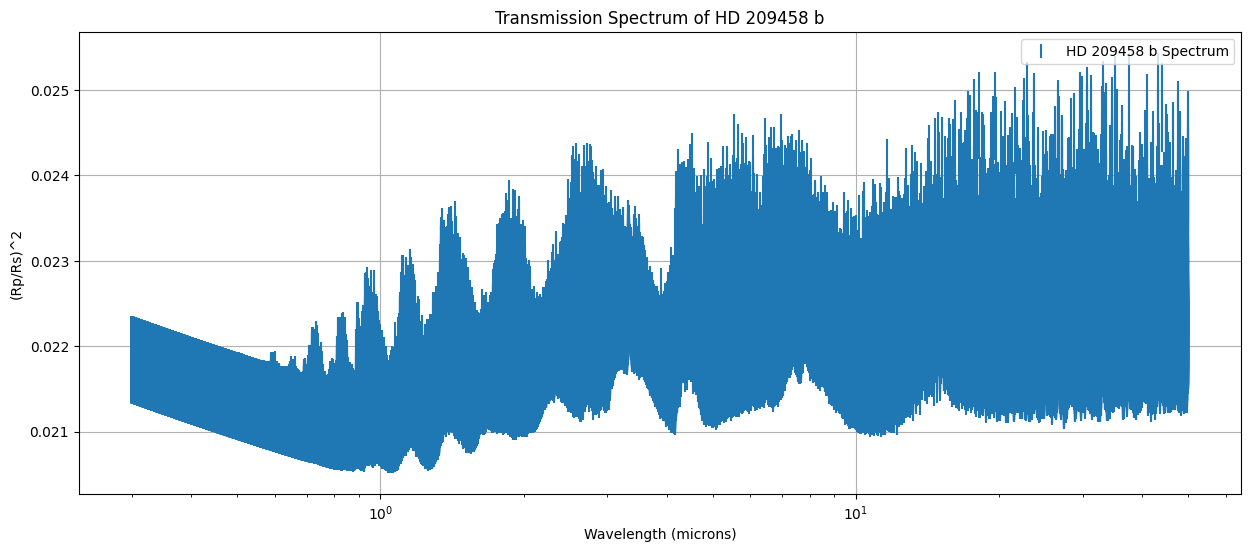

Plot saved to: /ca24/AstroCode-Collective/HD_209458_b_assignment3_taskA_spectrum.png


In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Load the .dat file
dat_file_path = "/ca24/AstroCode-Collective/HD_209458_b_assignment3_taskA_spectrum_updated.dat"
data = np.loadtxt(dat_file_path, skiprows=1)  # Skip the header row
wavelength = data[:, 0]  # Wavelength column
transit_depth = data[:, 1]  # (Rp/Rs)^2 column
error = data[:, 2]  # Error column

#print(wavelength)

# Plot the spectrum
plt.figure(figsize=(15, 6))
#plt.plot(wavelength,transit_depth)
plt.errorbar(wavelength, transit_depth, yerr=error, fmt=' ', label='HD 209458 b Spectrum' )
plt.xscale('log')
plt.xlabel('Wavelength (microns)')
plt.ylabel('(Rp/Rs)^2')
plt.title('Transmission Spectrum of HD 209458 b')
plt.legend()
#plt.xlim()
plt.grid(True)

# Save the plot
plot_output_path = "/ca24/AstroCode-Collective/HD_209458_b_assignment3_taskA_spectrum.png"
plt.savefig(plot_output_path)
plt.show()

print(f"Plot saved to: {plot_output_path}")
